In [2]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
# Re - regular expression module for Python
import re
# Calendar - Python functions related to the calendar
import calendar

# Manipulating dates and times for Python
from datetime import datetime

# Scikit-learn algorithms and functions
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import seaborn as sns
sns.set()


### **On which day of the week is the second drug (M01AE) most often sold?**

---



---



In [3]:
# Loading our sales daily data set from csv file using Pandas.
df = pd.read_csv("salesdaily.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [6]:
file = r'/drive/MyDrive/Colab Notebooks/archive/salesdaily.csv'


**Grouping the second drug sales by weekday name.**

---



**Let's look at the data.**

In [ ]:
df = df[['M01AE', 'Weekday Name']]
result = df.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AE', ascending=False)

Taking the weekday name with most sales and the volume of sales from the result

In [ ]:
resultDay = result.iloc[0,0]
resultValue = round(result.iloc[0,1], 2)

Printing the result

In [ ]:
print('The second drug, M01AE, was most often sold on ' + str(resultDay))
print('with the volume of ' + str(resultValue))

### **Pandas Profiling **

In [ ]:
! pip install pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 25.9 MB 745 kB/s
     |████████████████████████████████| 10.9 MB 5.0 kB/s 
     |████████████████████████████████| 596 kB 8.6 MB/s 
     |████████████████████████████████| 102 kB 3.7 MB/s 
     |████████████████████████████████| 675 kB 34.4 MB/s 
     |████████████████████████████████| 4.7 MB 22.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 10.6 MB/s 
     |████████████████████████████████| 38.1 MB 11.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=62fdadc5d1e935b533fd15cc480e4289d3d1934b37d85e90bcc1ab823a63a8e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-lp5irr6c/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=11f12b5ac74805f155da739152871325234a085f7ac13f703879a7102019eaeb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv('salesdaily.csv')
print(df) 

          datum  M01AB   M01AE  N02BA  ...  Year  Month  Hour  Weekday Name
0      1/2/2014   0.00   3.670   3.40  ...  2014      1   248      Thursday
1      1/3/2014   8.00   4.000   4.40  ...  2014      1   276        Friday
2      1/4/2014   2.00   1.000   6.50  ...  2014      1   276      Saturday
3      1/5/2014   4.00   3.000   7.00  ...  2014      1   276        Sunday
4      1/6/2014   5.00   1.000   4.50  ...  2014      1   276        Monday
...         ...    ...     ...    ...  ...   ...    ...   ...           ...
2101  10/4/2019   7.34   5.683   2.25  ...  2019     10   276        Friday
2102  10/5/2019   3.84   5.010   6.00  ...  2019     10   276      Saturday
2103  10/6/2019   4.00  11.690   2.00  ...  2019     10   276        Sunday
2104  10/7/2019   7.34   4.507   3.00  ...  2019     10   276        Monday
2105  10/8/2019   0.33   1.730   0.50  ...  2019     10   190       Tuesday

[2106 rows x 13 columns]


In [ ]:
#Generate a report 
profile = ProfileReport(df)
profile.to_file(output_file="salesdaily.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Which three drugs have the highest sales in Jan 2015, Jul 2016, Sep 2017**
Loading monthly sales data set from csv file using Pandas.

In [ ]:
df = pd.read_csv("salesmonthly.csv")

Let's look at the data.

In [ ]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Because we will be repeating the same calculations for different months and years it is a good idea to write a function

In [ ]:
def top3byMonth(month, year):
    """
    given a month and a year
    find top 3 drugs sold
    """
    month = str(month) if (month > 9) else '0'+str(month)
    year = str(year)
    # filter by date
    sales = df.loc[df['datum'].str.contains('^'+year+'\-'+month+'', flags=re.I, regex=True)]
    # reset index
    sales = sales.reset_index()
    # filter relevant columns
    topSales = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
    # sort values horizontally
    topSales = topSales.sort_values(by=0, ascending=False, axis=1)
    # print results
    print('Top 3 drugs by sale in '+calendar.month_name[int(month)]+' '+year)
    for field in topSales.columns.values[0:3]:
        print(' - Product: ' + str(field) + ', Volume sold: ' + str(round(topSales[field].iloc[0], 2)))
    print("\n")

We are now calling the function fir different months and years and printing results

In [ ]:
# top3 drugs by sale in January 2015
top3byMonth(1, 2015)

# top3 drugs by sale in July 2016
top3byMonth(7, 2016)

# top3 drugs by sale in September 2017
top3byMonth(9, 2017)

Top 3 drugs by sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 drugs by sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 drugs by sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




### **Which drug has sold most often on Mondays in 2017?**
Loading our sales daily data set from csv file using Pandas.

In [ ]:
df = pd.read_csv("salesdaily.csv")

Let's look at the data.

In [ ]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


Filtering out from the data everything else apart from yar 2017 and Monday

In [ ]:
df = df.loc[df['datum'].str.contains('2017', flags=re.I, regex=True) & (df['Weekday Name'] == 'Monday')]

Groupping by weekday name and summarising

In [ ]:
df = df.groupby(['Weekday Name'], as_index=False).sum()

Filtering only relevant columns and sorting values of most sold drugs horizontally to achieve the most often sold drug on the left

In [ ]:
df = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result = df.sort_values(by=0, ascending=False, axis=1)

Displaying results

In [ ]:
for field in result.columns.values[0:1]:
    print('The drug most often sold on Mondays in 2017 is ' + str(field))
    print('with the volume of ' + str(round(result[field].iloc[0], 2)))

The drug most often sold on Mondays in 2017 is N02BE
with the volume of 1160.56


### **What medicine sales may be in January 2020?**
Defining the scattering function that will display scattered sales data on the chart

In [ ]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

Defining predict sales and display Linear Regression model function

In [ ]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)

    # LINEAR REGRESSION - Predict for January 2020
    linear_predict = reg.predict([[predictFor]])
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

    # LINEAR REGRESSION - Error
    # error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    print('Linear Regression: ' + str(linear_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':linear_predict}

Defining predict sales and display Polynomial Regression model function

In [ ]:
def predictPolynomialRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Polynomial Regression')
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg_model = linear_model.LinearRegression()
    poly_reg_model.fit(X_poly, y_train)
    plt.plot(X_train, poly_reg_model.predict(poly_reg.fit_transform(X_train)), color='green', label='Polynomial regressor')
    plt.legend()
    plt.show()

    # Polynomial Regression - Predict/Test model
    y_predict_polynomial = poly_reg_model.predict(X_poly)

    # Polynomial Regression - Predict for January 2020
    polynomial_predict = poly_reg_model.predict(poly_reg.fit_transform([[predictFor]]))

    # Polynomial Regression - Accuracy
    # X_poly_test = poly_reg.fit_transform(X_test)
    accuracy = poly_reg_model.score(X_poly, y_train)

    # Polynomial Regression - Error
    # error = round(np.mean((y_predict_polynomial-y_train)**2), 2)

    # Result
    print('Polynomial Regression: ' + str(polynomial_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':poly_reg_model, 'values':polynomial_predict}

Defining predict sales and display Simple Vector Regression (SVR) function

In [ ]:
def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Simple Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('Simple Vector Regression (SVR): ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

We are defining a product that we will be predicting the January 2020 sales for. We can change it to a differnt one and use the same calculations for a different product.

In [ ]:
product = 'N02BA'

For storing all regression results

In [ ]:
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

To display a larger graph than a default with specify some additional parameters for Matplotlib library.

In [ ]:
rcParams['figure.figsize'] = 12, 8

We will be using monthly data for our predictions

In [ ]:
df = pd.read_csv("salesmonthly.csv")

We will use monthly sales data from 2017, 2018, 2019. We could also use just 2019 for that.

In [ ]:
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

It is always a good practice to look at the data often

In [ ]:
df

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...,...
65,65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


We are adding a sequence number for each month as an independent variable


In [ ]:
df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

Removing the first and the last incompleted record from Pandas Data Frame

In [ ]:
  # the first and the last available month is quite low which may indicate that it might be incomplete
# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

Cleaning up any rows with the product value = 0.

In [ ]:
  df = df[df[product] != 0]

Let's look at the data again.

In [ ]:
  df.head()

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,datumNumber
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,4
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,5
5,5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3,6


What value we predict for? January 2020. Because we have data until August 2019 we're predicting for 5 months ahead

In [ ]:
predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

Predictions for the product N02BA sales in January 2020


In [ ]:
regValues = {}

Preparing training and testing data by using train_test_split function. 70% for training and 30% for testing.

In [ ]:
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

Performing feature scaling. Scaling the feature will improve the performance of the model.


In [ ]:
# scale_X = StandardScaler()
# scale_y = StandardScaler()

# X_train = scale_X.fit_transform(X_train)
# y_train = scale_y.fit_transform(y_train.reshape(-1, 1))

# X_test = scale_X.fit_transform(X_test)
# y_test = scale_y.fit_transform(y_test.reshape(-1, 1))

Performing and saving results for Linear Regression

In [ ]:
  # LINEAR REGRESSION
linearResult = predictLinearRegression(X_train, y_train, X_test, y_test)
reg = linearResult['regressor']
regValues['Linear'] = round(linearResult['values'][0][0])

Linear Regression: [[77.06686399]] (Accuracy: 40%)


Performing and saving results for Polynomial Regression

In [ ]:
  # POLYNOMIAL REGRESSION
polynomialResult = predictPolynomialRegression(X_train, y_train, X_test, y_test)
polynomial_regressor = polynomialResult['regressor']
regValues['Polynomial'] = round(polynomialResult['values'][0][0])

Polynomial Regression: [[87.77637708]] (Accuracy: 41%)


Performing and saving results for Simple Vector Regression (SVR)

In [ ]:
# SIMPLE VECTOR REGRESSION (SVR)
svrResult = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor = svrResult['regressor']
regValues['SVR'] = round(svrResult['values'][0])

Simple Vector Regression (SVR): [121.81380487] (Accuracy: 5%)


Voting Regressor

In [ ]:
vRegressor = VotingRegressor(estimators=[('reg', reg), ('polynomial_regressor', polynomial_regressor), ('svr_regressor', svr_regressor)])

vRegressorRes = vRegressor.fit(X_train, y_train.ravel())

# VotingRegressor - Predict for January 2020
vRegressor_predict = vRegressor.predict([[predictFor]])
regValues['Voting Regressor'] = round(vRegressor_predict[0])
print('Voting Regressor January 2020 predicted value: ' + str(round(vRegressor_predict[0])))
regResults.loc[product] = regValues

Voting Regressor January 2020 predicted value: 92


Displaying all results

In [ ]:
regResults

,Linear,Polynomial,SVR,Voting Regressor
N02BA,77,88,122,92

















# **Pharma Sales Time Series Analysis**

In [ ]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#reading the data
hourly = pd.read_csv('saleshourly.csv')
daily = pd.read_csv('salesdaily.csv')
weekly = pd.read_csv('salesweekly.csv')
monthly = pd.read_csv('salesmonthly.csv')

# **Analysing Data Stucture**

In [ ]:
#function to print shape of a given data
def print_shape(data):
    print('Rows : ',data.shape[0])
    print('Columns : ',data.shape[1])

In [ ]:
print_shape(hourly)
print_shape(daily)
print_shape(weekly)
print_shape(monthly)

Rows :  50532
Columns :  13
Rows :  2106
Columns :  13
Rows :  302
Columns :  9
Rows :  70
Columns :  9


From the shape of monthly dataframe, we see that the data is of 70 months.

In [ ]:
hourly.head(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014 8:00,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,2014,1,8,Thursday
1,1/2/2014 9:00,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,2014,1,9,Thursday


In [ ]:
daily.head(2)


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.4,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.6,16.0,0.0,20.0,4.0,2014,1,276,Friday


In [ ]:
weekly.head(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2


In [ ]:
monthly.head(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.09,152.1,878.03,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.05,177.0,1001.90,347.0,31.0,122.0,36.2


**Notice that the format of datum column is different in hourly and monthly data and same in daily and weekly data.**

In [ ]:
#copy the data
hourly_original = hourly.copy()
daily_original = daily.copy()
weekly_original = weekly.copy()

**Let us now convert data type of datum column from object to datetime**

In [ ]:
#converting datatype of dates from object to Datetime
monthly['datum'] = pd.to_datetime(monthly['datum'], format= '%Y-%m-%d')
weekly['datum'] = pd.to_datetime(weekly['datum'], format= '%m/%d/%Y')
daily['datum'] = pd.to_datetime(daily['datum'], format= '%m/%d/%Y')
hourly['datum'] = pd.to_datetime(hourly['datum'], format= '%m/%d/%Y %H:%M')

### **Analysing Monthly Series**
Firstly, let us analyse the monthly data and see what inferences can we draw from this data.

In [ ]:
#import datetime for dates and time realted calculations
import datetime as dt

**Seperate year, month and day from the datum column**

In [ ]:
#extracting year from dates
monthly['year'] = monthly['datum'].dt.year

In [ ]:
#extracting month from dates
monthly['month'] = monthly['datum'].dt.month

In [ ]:
#extracting day from dates
monthly['day'] = monthly['datum'].dt.day

In [ ]:
#set index equal to the dates which will help us in visualising the time series
monthly.set_index(monthly['datum'], inplace= True)

In [ ]:
monthly.head(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2014-01-31,2014-01-31,127.69,99.09,152.1,878.03,354.0,50.0,112.0,48.2,2014,1,31
2014-02-28,2014-02-28,133.32,126.05,177.0,1001.90,347.0,31.0,122.0,36.2,2014,2,28


## **Data distribution analysis**
Chart with daily sales for different categories of interest is shown below. N02BE and N05B charts, though showing the similar trends, are suppresed because of the larger scale which makes the other illustrations less readable.

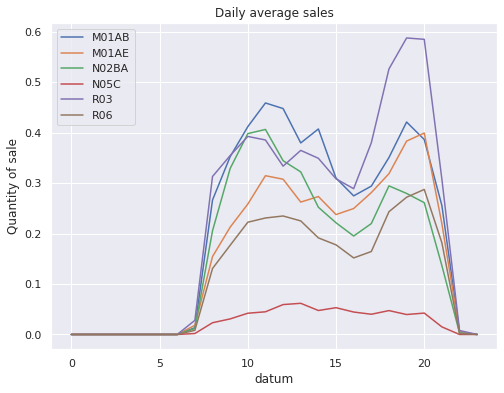

In [ ]:
dfatch=pd.read_csv('saleshourly.csv')
dfatch['datum']= pd.to_datetime(dfatch['datum']) 

grp1=dfatch.groupby(dfatch.datum.dt.hour)['M01AB'].mean()
grp2=dfatch.groupby(dfatch.datum.dt.hour)['M01AE'].mean()
grp3=dfatch.groupby(dfatch.datum.dt.hour)['N02BA'].mean()
grp6=dfatch.groupby(dfatch.datum.dt.hour)['N05C'].mean()
grp7=dfatch.groupby(dfatch.datum.dt.hour)['R03'].mean()
grp8=dfatch.groupby(dfatch.datum.dt.hour)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

In [ ]:
#define a function to plot yearly sales of every category of drug.
def plot_yearly_sales(column):
    monthly.groupby('year')[column].mean().plot.bar()#calculating yearly sales using groupby
    plt.title(f'Yearly sales of {column}')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.show()

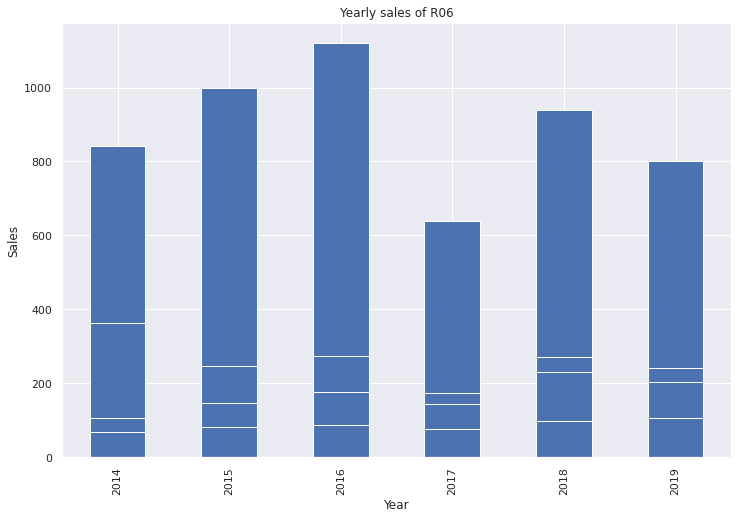

In [ ]:
#plotting yearly sales of each drug category
for i in monthly.columns[1:9]:#drug categories are from 1 to 8 index

    plot_yearly_sales(i) 

**Analysing the above yearly sales graphs, we can conclude that:**


*   The year 2017 has seen a major dip in the sales of drugs. This need digging. Lets do it




In [ ]:
#lets see some statistics related to the data
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571,2016.428571,6.357143,30.428571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336,1.690309,3.417923,0.843929
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,28.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000,2015.000000,3.250000,30.000000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000,2016.000000,6.000000,31.000000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500,2018.000000,9.000000,31.000000
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000,2019.000000,12.000000,31.000000


Here, we see that the minimum value of sale of majority of drugs is 0 while that of drug N05B is 1. This is the reason why year 2017 has lowest sales.

In [ ]:
#plot line curve to analyse monthly sales
def plot_line_curve(series):
    plt.figure(figsize= (15,5))
    series.plot(kind= 'line')
    plt.title(f'Monthly Sales of Drug : {col}')
    plt.show()

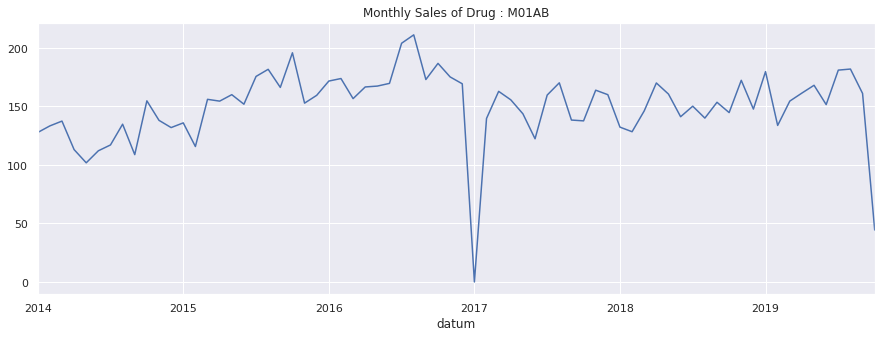

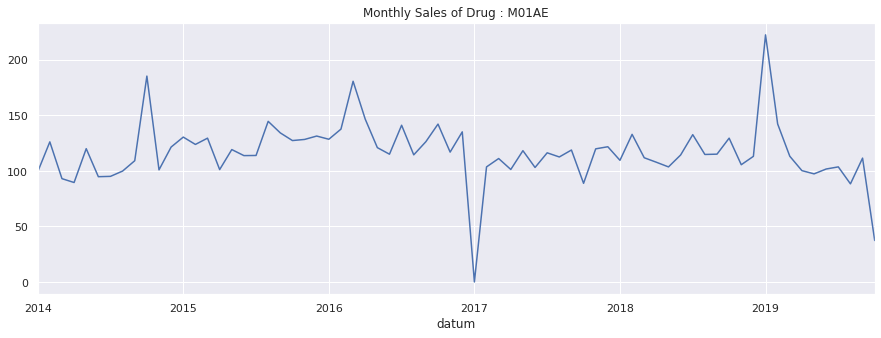

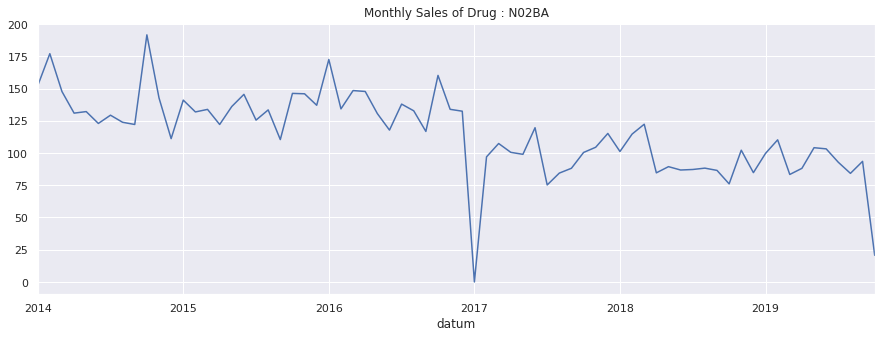

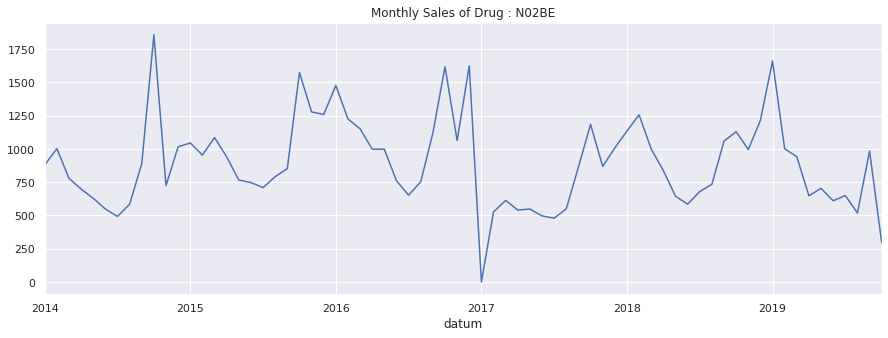

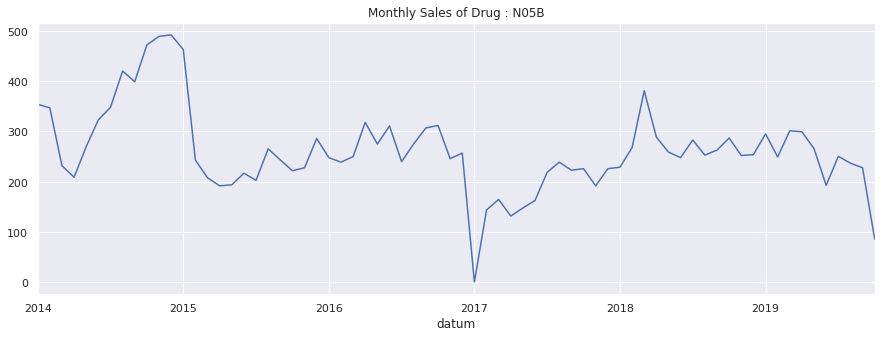

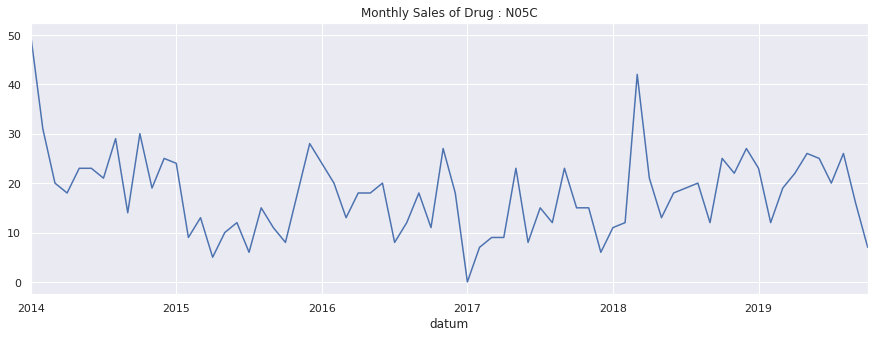

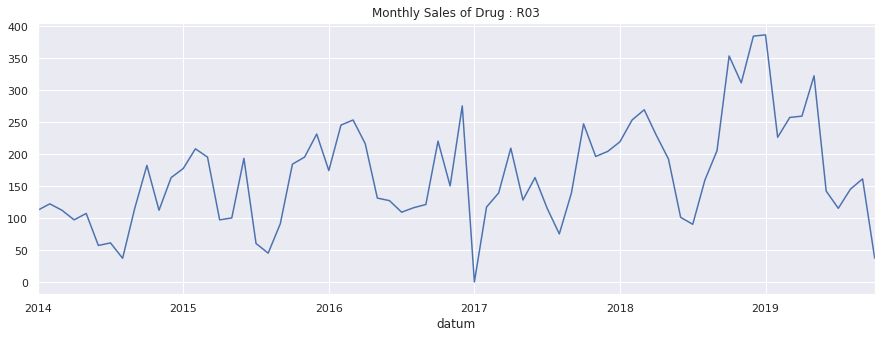

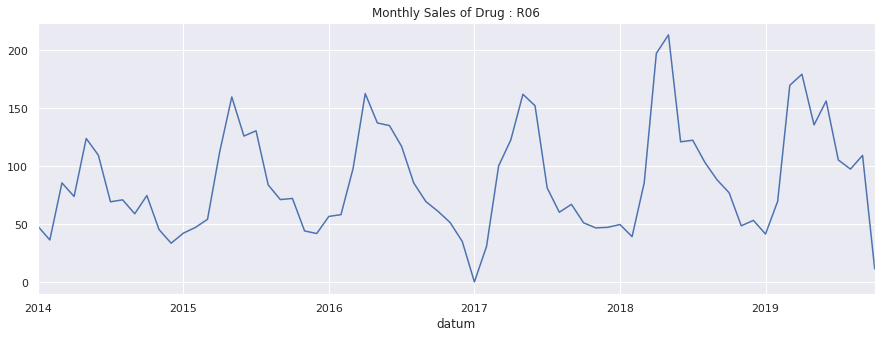

In [ ]:
for col in monthly.columns[1:9]:
    plot_line_curve(monthly[col])

From the above graphs, we can infer that the sales for first month of 2017 is 0. This means that we have missing values for the first month. Let us analyse this from daily data.
But first let us preprocess daily data also.

In [ ]:
daily.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

In [ ]:
#extracting days from date
daily['day'] = daily['datum'].dt.day

In [ ]:
#set dates as index
daily.set_index(daily['datum'], inplace= True)

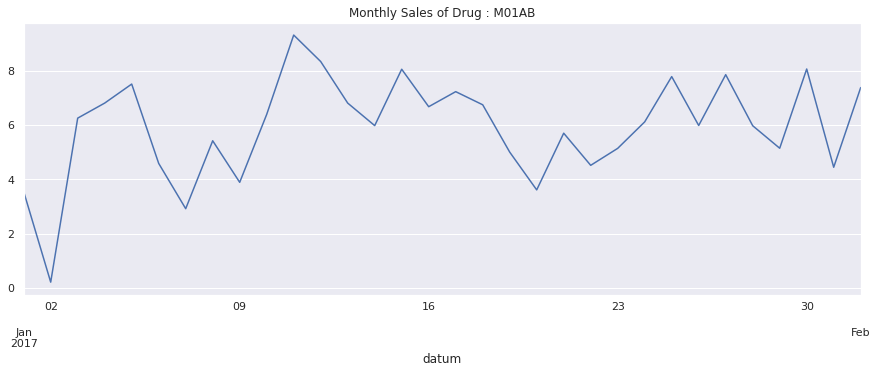

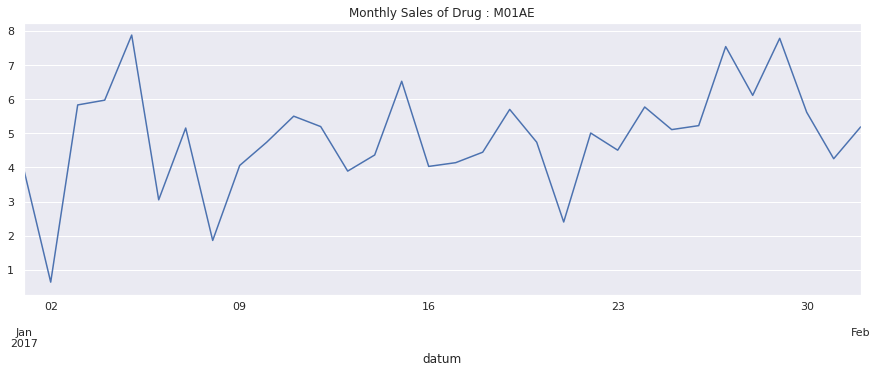

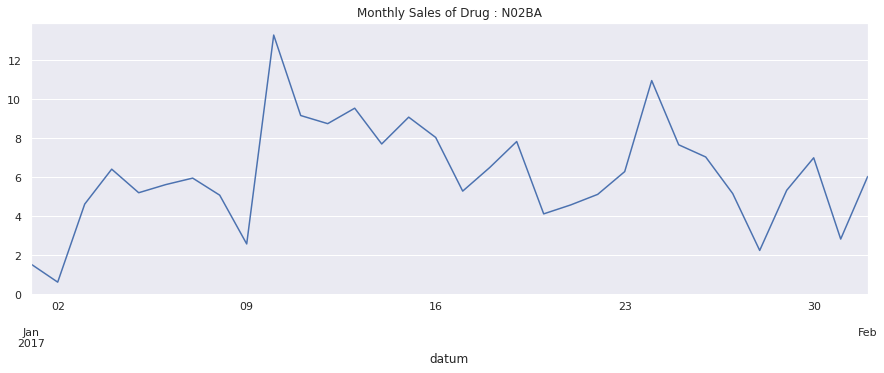

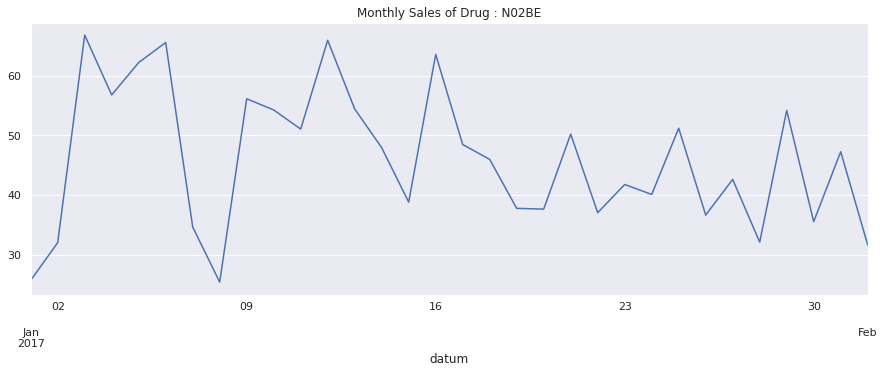

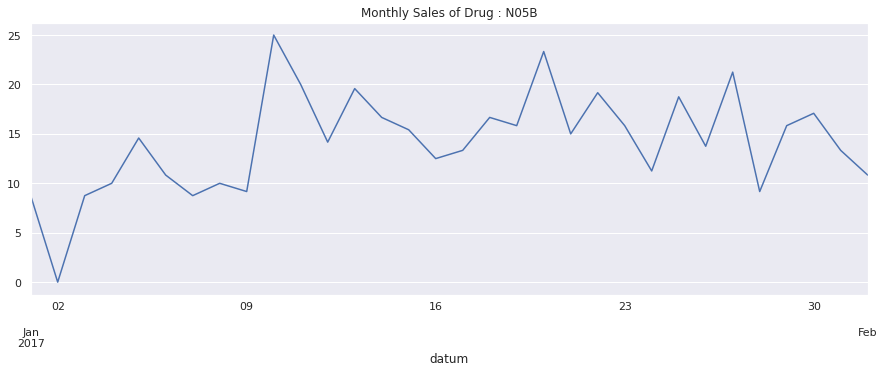

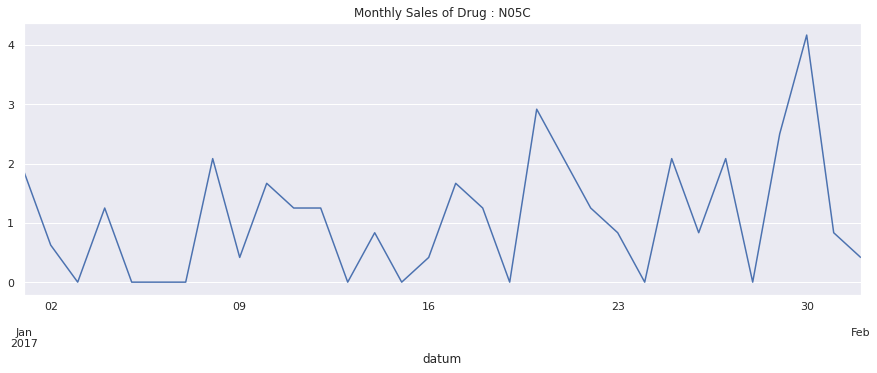

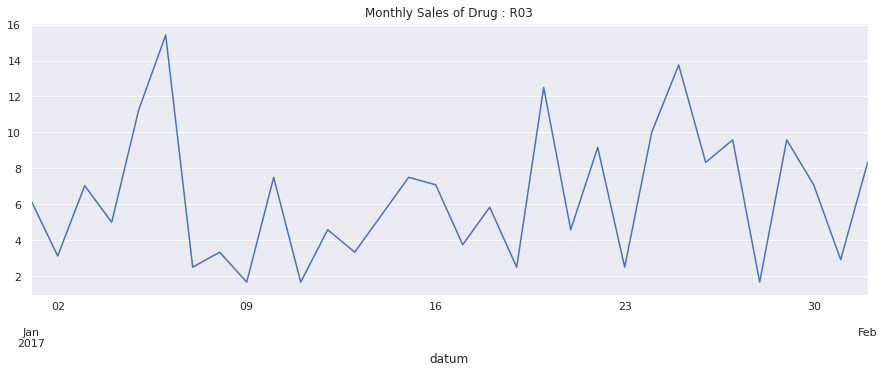

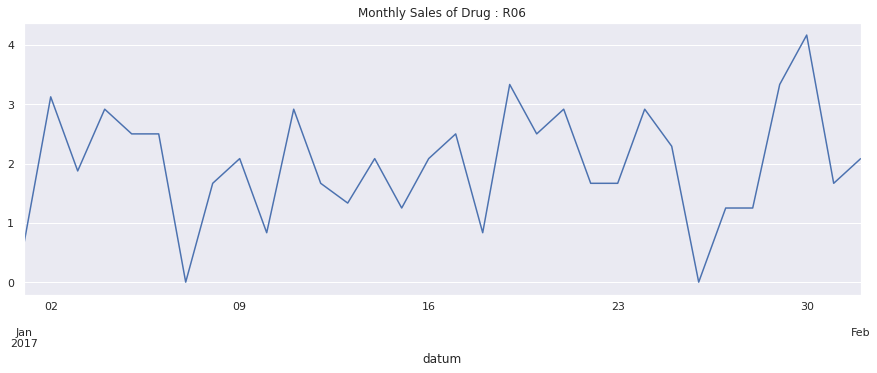

In [ ]:
#looking at sales data from 1st Jan, 2017 to 1st Feb, 2019
for col in daily.columns[1:9]:
    plot_line_curve(daily[col].loc['1/1/2017':'2/1/2017'])

From these graphs, we can say say that the data is not missing. Instead, the sales of drugs on 2nd January, 2017 is low rather there is no sale on 2nd Feb.

# **Analysing total sales of drug**

In [ ]:
#calculating total sales
monthly['total_sales'] = monthly['M01AB']
for cols in monthly.columns[2:9]:
    monthly['total_sales'] = monthly['total_sales']+monthly[cols]

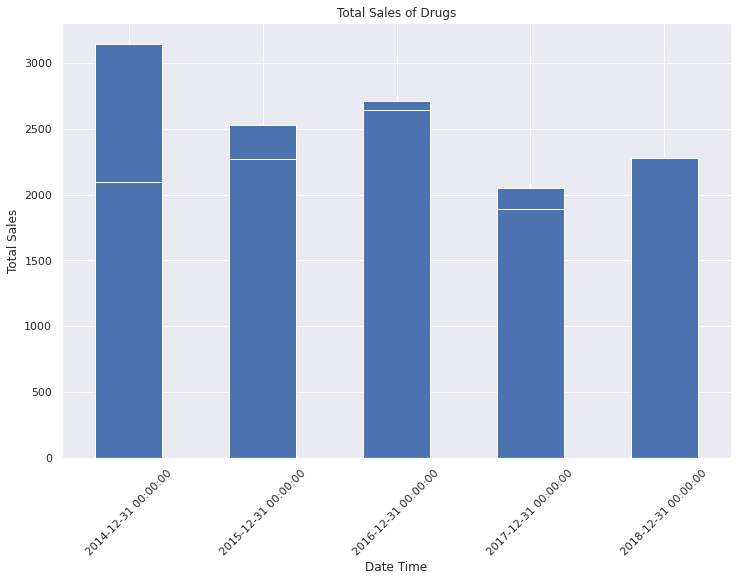

In [ ]:
monthly.groupby('month')['total_sales'].plot.bar(rot=45)
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

From above diagram we can hence validate that the sales of drugs have been lowest in the year 2017.